In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process

In [2]:
df = pd.read_csv('Words.csv', sep = ';', index_col = 0, parse_dates = True )

In [3]:
df.sort_index(inplace=True)

In [4]:
df.tail()

word language
date                          
2022-01-17  Fahrtende   german
2022-01-17  schimpfen   german
2022-01-17  Schnupfen   german
2022-01-17       bote  spanish
2022-01-17        nur   german

In [5]:
df.shape[0]

1007

In [6]:
df['month'] =df.index.to_period('M')

In [7]:
df.head()

word language    month
date                                
2020-08-07    Mama  neutral  2020-08
2020-09-24    agua  spanish  2020-09
2020-10-07  Abuela  spanish  2020-10
2020-10-31    luna  spanish  2020-10
2020-11-05  Banane   german  2020-11

In [8]:
bday = pd.to_datetime('19 October 2019')

In [9]:
df['Leo_months'] = ((df.index - bday)/np.timedelta64(1, 'M'))

In [10]:
df['Leo_months'] = df['Leo_months'].astype(int)

In [11]:
df.tail()

word language    month  Leo_months
date                                               
2022-01-17  Fahrtende   german  2022-01          26
2022-01-17  schimpfen   german  2022-01          26
2022-01-17  Schnupfen   german  2022-01          26
2022-01-17       bote  spanish  2022-01          26
2022-01-17        nur   german  2022-01          26

In [12]:
df.groupby(['Leo_months'])['word'].count().cumsum()

Leo_months
9        1
11       3
12       6
13      17
14      25
15      43
16      68
17      97
18     184
19     300
20     419
21     519
22     623
23     724
24     842
25     924
26    1007
Name: word, dtype: int64

In [13]:
#82A0BC

<Figure size 720x432 with 0 Axes>

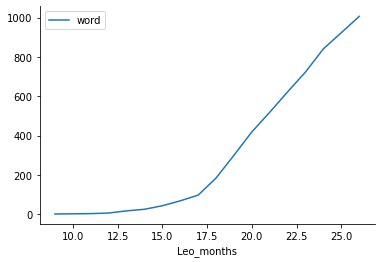

In [14]:
plt.figure(figsize = (10,6))
df.groupby(['Leo_months'])['word'].count().cumsum().to_frame().plot()
sns.despine()

In [15]:
df_months = df.groupby(['Leo_months'])['word'].count().cumsum().to_frame().reset_index()
df_months.head(2)

Leo_months  word
0           9     1
1          11     3

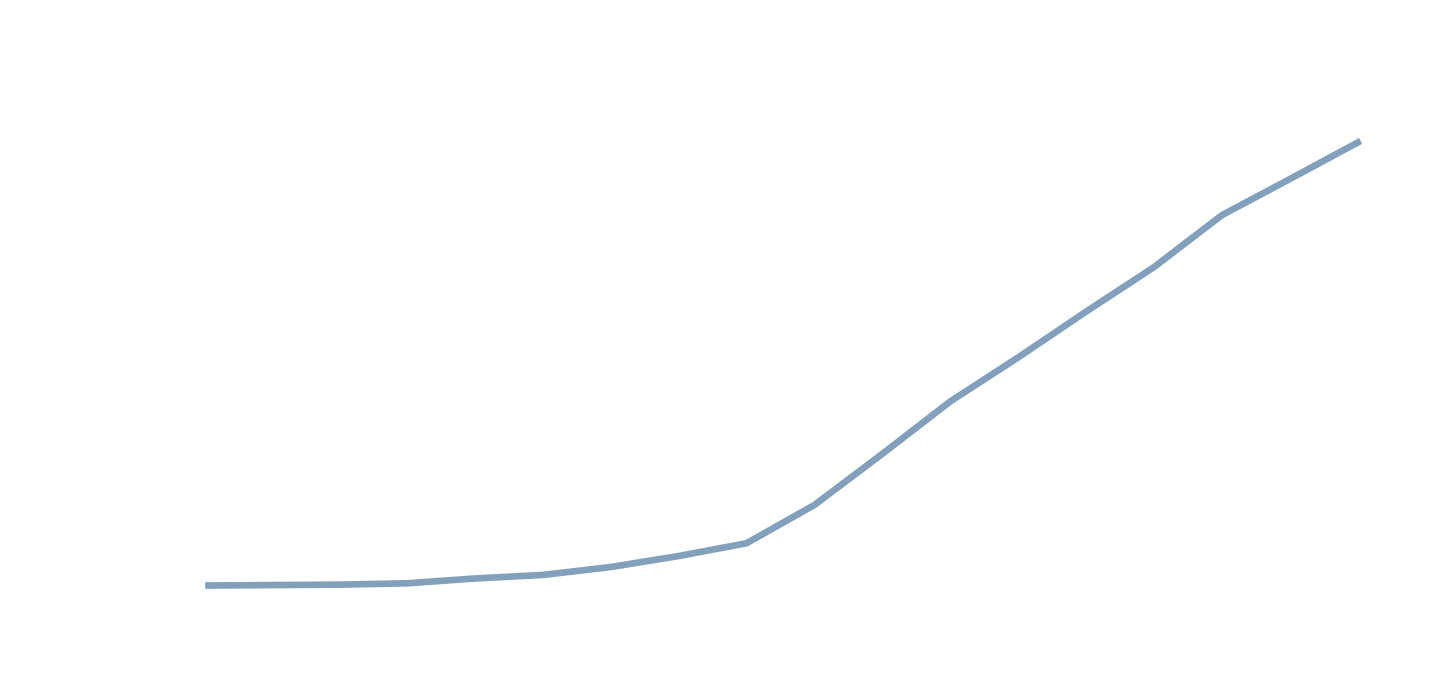

In [16]:
plt.figure(figsize=(12, 6), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# of words',rotation=0, size = 18)
plt.xlim([9,27])
ax.yaxis.set_label_coords(-0.09,1.02)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
plt.hlines(100, 0, 17, linestyle='--', color = 'white')
#plt.fill_between(df.Date.values, df.Data.values)
sns.despine()
plt.tight_layout()
plt.savefig('words.png', transparent=True)

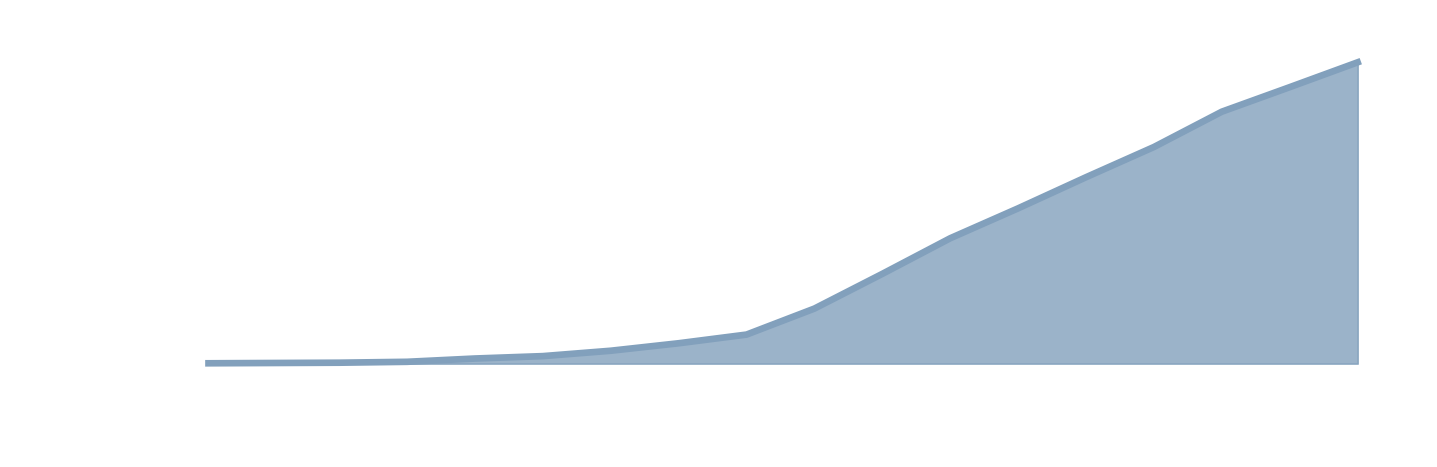

In [17]:
plt.figure(figsize=(12, 4), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# of words',rotation=0, size = 18)
plt.xlim([9,27])
ax.yaxis.set_label_coords(-0.09,1.02)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_months.Leo_months.values, df_months.word.values, color = '#82A0BC', alpha = 0.8)
sns.despine()
plt.tight_layout()
plt.savefig('words_filled_wide.png', transparent=True)

In [18]:
df.head()

word language    month  Leo_months
date                                            
2020-08-07    Mama  neutral  2020-08           9
2020-09-24    agua  spanish  2020-09          11
2020-10-07  Abuela  spanish  2020-10          11
2020-10-31    luna  spanish  2020-10          12
2020-11-05  Banane   german  2020-11          12

In [19]:
df_months_spa = df.loc[df['language'] == 'spanish',:].groupby(['Leo_months'])['word'].count().cumsum().to_frame().reset_index()

In [20]:
df_months_ger = df.loc[df['language'] == 'german',:].groupby(['Leo_months'])['word'].count().cumsum().to_frame().reset_index()

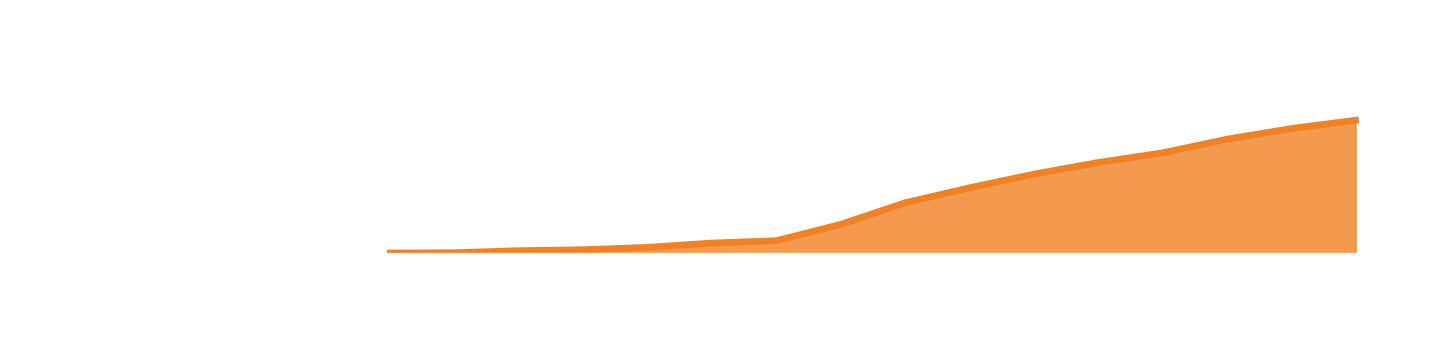

In [21]:
plt.figure(figsize=(12, 3), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_months_spa, x = 'Leo_months', y = 'word', color = '#F28123', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# of Spanish words',rotation=0, size = 18)
plt.xlim([9,27])
plt.ylim([0,600])
ax.yaxis.set_label_coords(-0.09,1.07)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_months_spa.Leo_months.values, df_months_spa.word.values, color = '#F28123', alpha = 0.8)
sns.despine()
plt.tight_layout()
plt.savefig('words_filled_wide_spa.png', transparent=True)

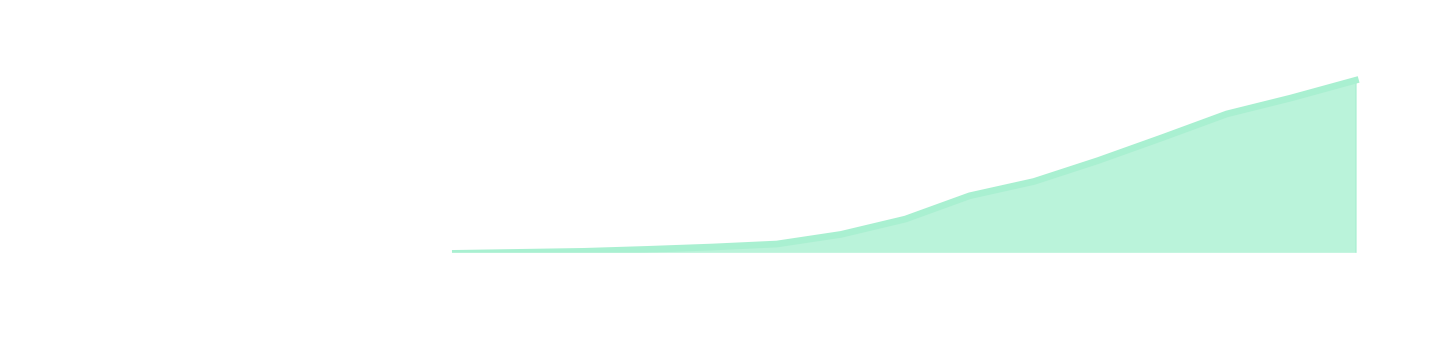

In [22]:
plt.figure(figsize=(12, 3), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_months_ger, x = 'Leo_months', y = 'word', color = '#A9F0D1', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# of German words',rotation=0, size = 18)
plt.xlim([9,27])
plt.ylim([0,600])
ax.yaxis.set_label_coords(-0.09,1.07)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_months_ger.Leo_months.values, df_months_ger.word.values, color = '#A9F0D1', alpha = 0.8)
sns.despine()
plt.tight_layout()
plt.savefig('words_filled_wide_ger.png', transparent=True)

### Language links for words

In [27]:
df.loc[df['language'] == 'spanish'].to_csv('words_spa.csv')

In [29]:
df.loc[df['language'] == 'german'].to_csv('words_ger.csv')

#### Idea for automatic links
- Translate both to english
- Find duplicates

#### Translation

In [21]:
import translators as ts

Using Germany server backend.


In [23]:
phrase = 'The quick brown fox jumps over the lazy dog.'

In [28]:
ts.google('Abuela', from_language='es', to_language='en')

'Grandmother'

In [29]:
df.head()

word language    month  Leo_months
date                                            
2020-08-07    Mama  neutral  2020-08           9
2020-09-24    agua  spanish  2020-09          11
2020-10-07  Abuela  spanish  2020-10          11
2020-10-31    luna  spanish  2020-10          12
2020-11-05  Banane   german  2020-11          12

In [30]:
def translate_to_en(word, language):
    if language == 'spanish':
        translation = ts.google(word, from_language='es', to_language='en')
    elif language == 'german':
        translation = ts.google(word, from_language='de', to_language='en')
    else:
        translation = word
    return translation
    

In [49]:
ts.google('éste', from_language='es', to_language='en')

'East'

In [32]:
df.head()

word language    month  Leo_months
date                                            
2020-08-07    Mama  neutral  2020-08           9
2020-09-24    agua  spanish  2020-09          11
2020-10-07  Abuela  spanish  2020-10          11
2020-10-31    luna  spanish  2020-10          12
2020-11-05  Banane   german  2020-11          12

In [33]:
df.head().apply(lambda x: translate_to_en(x['word'], x['language']), axis=1)

date
2020-08-07           Mama
2020-09-24          Water
2020-10-07    Grandmother
2020-10-31           Moon
2020-11-05         banana
dtype: object

In [34]:
df['en_word'] = df.apply(lambda x: translate_to_en(x['word'], x['language']), axis=1)

In [36]:
df.to_csv('words_with_translation.csv')

In [46]:
df.head(15)

word language    month  Leo_months      en_word
date                                                          
2020-08-07     Mama  neutral  2020-08           9         Mama
2020-09-24     agua  spanish  2020-09          11        Water
2020-10-07   Abuela  spanish  2020-10          11  Grandmother
2020-10-31     luna  spanish  2020-10          12         Moon
2020-11-05   Banane   german  2020-11          12       banana
2020-11-15     Pepe  neutral  2020-11          12         Pepe
2020-11-18     Ball   german  2020-11          13         ball
2020-11-22      más  spanish  2020-11          13         plus
2020-11-23       no  spanish  2020-11          13           No
2020-11-24     Mami  neutral  2020-11          13         Mami
2020-12-01      luz  spanish  2020-12          13        light
2020-12-04     Auge   german  2020-12          13          Eye
2020-12-10      ups  neutral  2020-12          13          ups
2020-12-13  lechita  spanish  2020-12          13         milk
2020-12-15     este  spanish  2020-12          13         East

In [45]:
df['en_word'].unique()

array(['Mama', 'Water', 'Grandmother', 'Moon', 'banana', 'Pepe', 'ball',
       'plus', 'No', 'Mami', 'light', 'Eye', 'ups', 'milk', 'East', 'hot',
       'hello', 'no', 'Marta', 'Juljul', 'the', 'tree', 'mouth', 'broken',
       'bye Bye', 'wow', 'to', 'Bob', 'Bretzel', 'boobie', 'sun', 'shoe',
       'Rieke', 'Here', 'grape', 'blue', 'little girl', 'Bouncing',
       'danger', 'Bravo', 'granny', 'Nose', 'Game', 'Thank you', 'heart',
       'Yes', 'other', 'House', 'dad', 'Leo', 'Well', 'Hi', 'pomp',
       'Mario', 'Sushi', 'cloud', 'tea', 'Moni', 'bubbles', 'darling',
       'three', 'young guy', 'sock', 'Apple', 'octopus', 'Jonas', 'So',
       'ok', 'tiny', 'Noam', 'Nicola', 'Ahjö', 'fire', 'Lotte', 'cheese',
       'bike', 'Katrin', 'flower', 'Pizza', 'pasta', 'Markus', 'key',
       'Fritzi', 'Auerhahn', 'Chu', 'Buttocks', 'Abi', 'caca', 'Barbara',
       'Chrisi', 'orange', 'automobile', 'Garbage disposal', 'red',
       'meal', 'water', 'Joghurt', 'down', 'Grandfather', 'Cashe

### ~Language detection with spacy~

- Idea: check for German, check for spanish, if none define as neutral
- **Idea failed**: Only 395 from 1000 words considered german or spanish. Better continue with manual annotatio

In [31]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

In [32]:
def get_lang_detector(nlp, name):
    return LanguageDetector()

In [33]:
nlp_ger = spacy.load("de_core_news_sm")

In [34]:
Language.factory("language_detector", func=get_lang_detector)
nlp_ger.add_pipe('language_detector')

In [35]:
nlp_spa = spacy.load('es_core_news_sm')

In [36]:
df.word.iloc[23]

'boca'

In [37]:
df.head(3)

word language    month  Leo_months
date                                            
2020-08-07    Mama  neutral  2020-08           9
2020-09-24    agua  spanish  2020-09          11
2020-10-07  Abuela  spanish  2020-10          11

In [38]:
doc = nlp_ger(df.word.iloc[46])

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.is_oov, doc._.language)

gracias gracias ADV PTKVZ True {'language': 'es', 'score': 0.9999947264047317}


In [39]:
def predict_lang(text):
    doc = nlp_ger(text)
    return doc._.language['language']

In [40]:
df['language'] = df['word'].apply(predict_lang)

In [41]:
df[df['language'].isin(['de','es'])]

word language    month  Leo_months
date                                               
2020-12-04       Auge       de  2020-12          13
2020-12-15       heiß       de  2020-12          13
2020-12-22       nein       de  2020-12          14
2021-01-22    tschüss       de  2021-01          15
2021-01-25         zu       de  2021-01          15
...               ...      ...      ...         ...
2022-01-17    Ruhrei        de  2022-01          26
2022-01-17  accidente       es  2022-01          26
2022-01-17  Fahrtende       de  2022-01          26
2022-01-17  schimpfen       de  2022-01          26
2022-01-17  Schnupfen       de  2022-01          26

[398 rows x 4 columns]

### Language distribution

In [27]:
df['word_no'] = np.arange(1,df.shape[0]+1)

In [28]:
languages = ['german', 'spanish', 'neutral']

In [29]:
df['language'] = [process.extractOne(word, languages)[0] for word in list(df['language'])]

In [30]:
df['word_no'] = np.arange(1,df.shape[0]+1)

<Figure size 864x216 with 0 Axes>

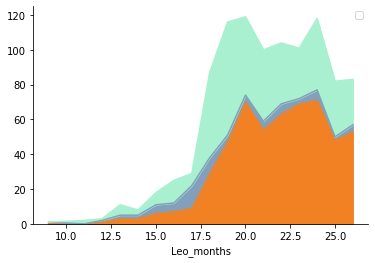

In [31]:
plt.figure(figsize = (12,3))
df.groupby(['Leo_months', 'language'])['word_no'].count().unstack().plot.area(color = ['#F28123','#82A0BC','#A9F0D1'])
plt.legend('')
sns.despine()

In [32]:
df[df['language'] == 'german'].groupby('Leo_months')['word_no'].count()

Leo_months
12     1
13     3
14     3
15     6
16     7
17     9
18    29
19    47
20    70
21    54
22    63
23    69
24    71
25    48
26    53
Name: word_no, dtype: int64

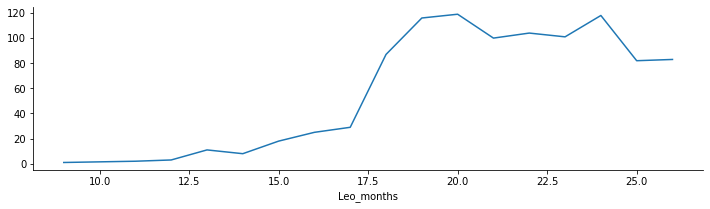

In [33]:
plt.figure(figsize = (12,3))
df.groupby('Leo_months')['word_no'].count().plot()
sns.despine()

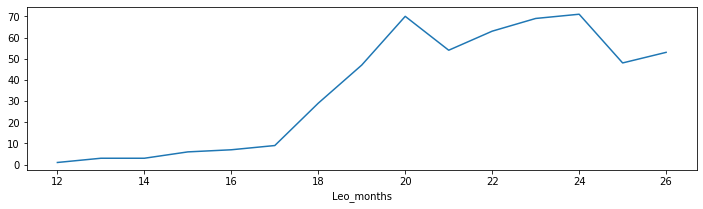

In [34]:
plt.figure(figsize = (12,3))
df[df['language'] == 'german'].groupby('Leo_months')['word_no'].count().plot()
#sns.despine()

In [35]:
df_new_spa_words = df[df['language'] == 'spanish'].groupby('Leo_months')['word_no'].count().to_frame().reset_index()
df_new_spa_words.head()

Leo_months  word_no
0          11        2
1          12        1
2          13        6
3          14        3
4          15        7

In [36]:
df_new_ger_words = df[df['language'] == 'german'].groupby('Leo_months')['word_no'].count().to_frame().reset_index()
df_new_spa_words.head()
df_new_ger_words.head()

Leo_months  word_no
0          12        1
1          13        3
2          14        3
3          15        6
4          16        7

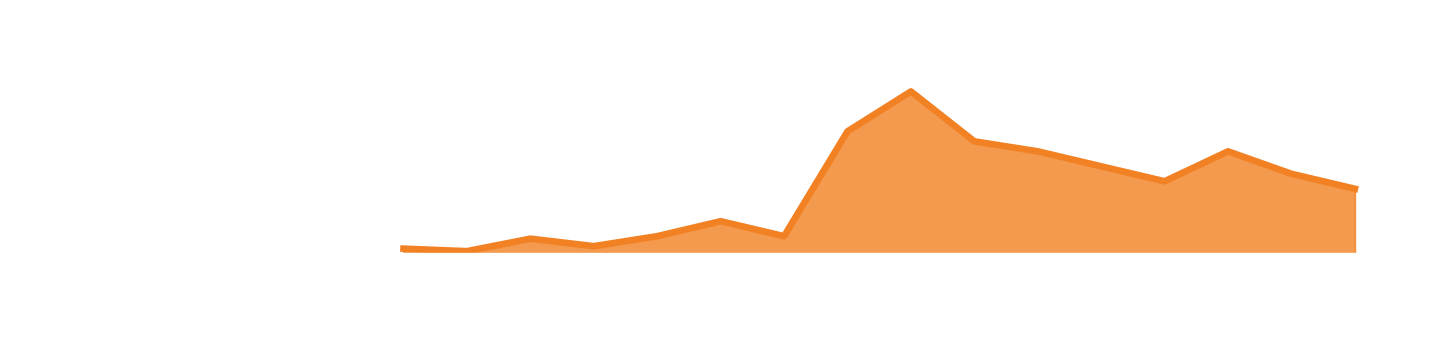

In [37]:
plt.figure(figsize=(12, 3), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_new_spa_words, x = 'Leo_months', y = 'word_no', color = '#F28123', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# new Spanish words',rotation=0, size = 18)
plt.xlim([9,27])
plt.ylim([0,80])
ax.yaxis.set_label_coords(-0.09,1.07)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_new_spa_words.Leo_months.values, df_new_spa_words.word_no.values, color = '#F28123', alpha = 0.8)
sns.despine()
plt.tight_layout()
plt.savefig('words_filled_wide_spa.png', transparent=True)

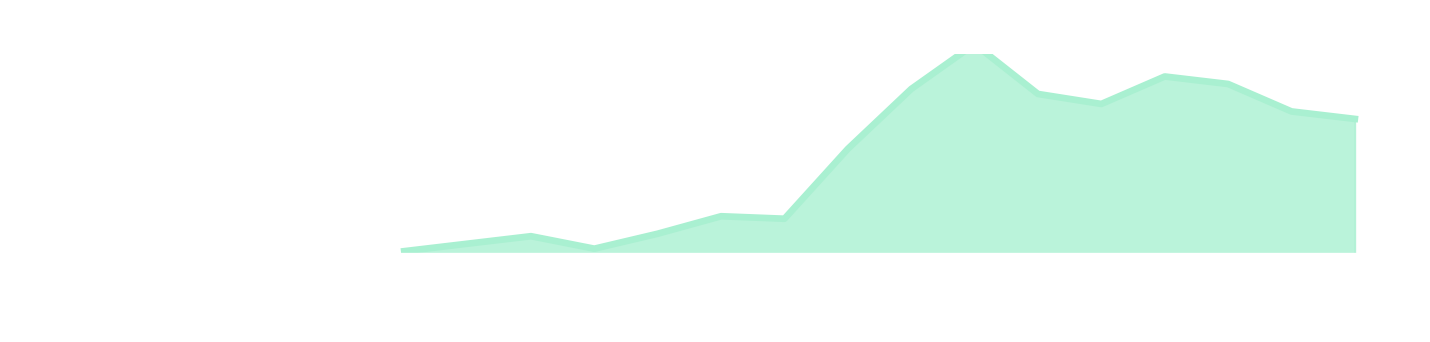

In [53]:
plt.figure(figsize=(12, 3), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_new_ger_words, x = 'Leo_months', y = 'word_no', color = '#A9F0D1', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# new German words',rotation=0, size = 18)
plt.xlim([9,27])
plt.ylim([0,80])
ax.yaxis.set_label_coords(-0.09,1.07)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_new_ger_words.Leo_months.values, df_new_ger_words.word_no.values, color = '#A9F0D1', alpha = 0.8)
sns.despine()
plt.tight_layout()
plt.savefig('words_filled_wide_ger.png', transparent=True)

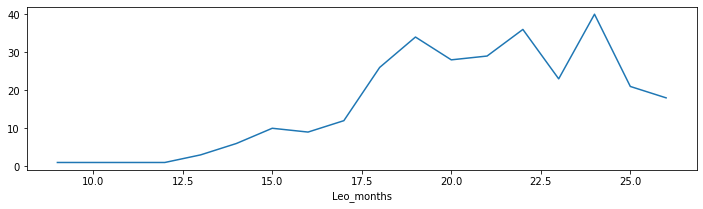

In [54]:
plt.figure(figsize = (12,3))
df[df['language'] == 'spanish'].groupby('Leo_months')['word_no'].count().plot()
#sns.despine()

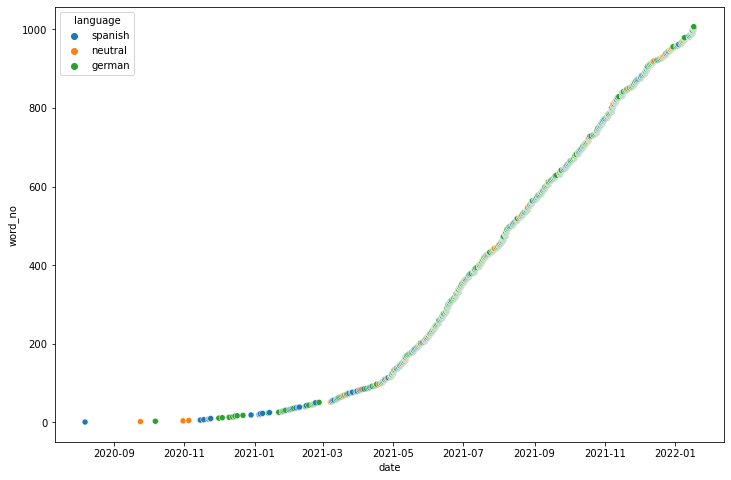

In [55]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = 'date', y = 'word_no', hue = 'language')

In [56]:
words_month = df.groupby(['Leo_months'])['word_no'].count().cumsum().to_frame().reset_index()

In [57]:
words_month['words'] = df.groupby(['Leo_months'])['word'].apply(lambda x:' '.join(x)).to_frame().reset_index()['word']

In [38]:
words_month

NameError: name 'words_month' is not defined

### Type of word analysis
Universal POS 

In [39]:
nlp_spa = spacy.load('es_core_news_sm')
doc = nlp_ger(df.word.iloc[46])

NameError: name 'spacy' is not defined

In [60]:
doc = nlp_spa(df.word.iloc[46])

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.is_oov)

gracias gracias NOUN NOUN True


In [61]:
def get_pos_spa(word):
    pos = []
    doc = nlp_spa(word)
    for token in doc:
        pos.append(token.pos_)
    return pos[0]

In [62]:
df['language'].iloc[1]

'neutral'

In [63]:
def get_pos(word, language):
    pos = []
    if language == 'spanish':
        doc = nlp_spa(word)
    else:
        doc = nlp_ger(word)
    for token in doc:
        pos.append(token.pos_)
    return pos[0]

In [64]:
df.columns

Index(['word', 'language', 'month', 'Leo_months', 'word_no'], dtype='object')

In [65]:
df['word type (pos)']  = df.apply(lambda x:get_pos(x['word'], x['language']), axis = 1)

In [66]:
df.rename(columns = {'word type (pos)':'word type (pos) new'}, inplace = True)

#### Merge with corrected `pos` data

In [67]:
pos_correct = pd.read_csv('words_clean_pos.csv', index_col=0)

In [68]:
pos_correct.head()

word word type (pos)
0    Mama           PROPN
1    agua            NOUN
2    luna            NOUN
3  Banane            NOUN
4    Pepe           PROPN

In [69]:
pos_correct.head()

word word type (pos)
0    Mama           PROPN
1    agua            NOUN
2    luna            NOUN
3  Banane            NOUN
4    Pepe           PROPN

In [70]:
df = df.drop_duplicates(subset = ['word']).merge(pos_correct, on = 'word')

In [71]:
df.drop('word type (pos) new', axis = 1, inplace = True)

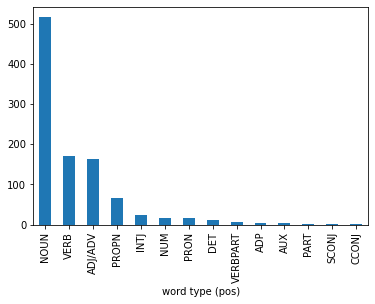

In [72]:
df.groupby('word type (pos)')['word'].count().sort_values(ascending = False).plot.bar()

In [73]:
df.loc[(df['word type (pos)'] == 'ADJ')| (df['word type (pos)'] == 'ADV'), 'word type (pos)'] = "ADJ/ADV"

In [74]:
list(df.groupby('word type (pos)')['word'].count().sort_values(ascending = False).to_frame().index)

['NOUN',
 'VERB',
 'ADJ/ADV',
 'PROPN',
 'INTJ',
 'NUM',
 'PRON',
 'DET',
 'VERBPART',
 'ADP',
 'AUX',
 'PART',
 'SCONJ',
 'CCONJ']

In [79]:
df[['word', 'language', 'word type (pos)']].drop_duplicates(subset = ['word']).head(11)

word language word type (pos)
0     Mama  spanish           PROPN
1     agua  neutral            NOUN
2     luna  neutral            NOUN
3   Banane  neutral            NOUN
4     Pepe  spanish           PROPN
5     Ball  spanish            NOUN
6      más  spanish         ADJ/ADV
8       no  neutral            INTJ
9     Mami  spanish           PROPN
10     luz   german            NOUN
11    Auge   german            NOUN

<Figure size 720x432 with 0 Axes>

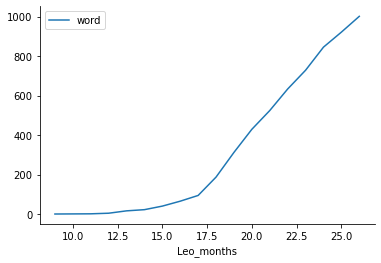

In [814]:
plt.figure(figsize = (10,6))
df.groupby(['Leo_months'])['word'].count().cumsum().to_frame().plot()
sns.despine()

In [80]:
df.head()

word language    month  Leo_months  word_no word type (pos)
0    Mama  spanish  2020-08           9        1           PROPN
1    agua  neutral  2020-09          11        2            NOUN
2    luna  neutral  2020-10          12        4            NOUN
3  Banane  neutral  2020-11          12        5            NOUN
4    Pepe  spanish  2020-11          12        6           PROPN

<Figure size 720x432 with 0 Axes>

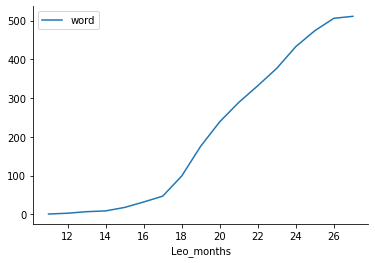

In [636]:
plt.figure(figsize = (10,6))
df.loc[df['word type (pos)'] == 'NOUN',:].groupby(['Leo_months'])['word'].count().cumsum().to_frame().plot()
sns.despine()

### Total words vs types of words

In [921]:
df_first_appearance = df.drop_duplicates(subset = ['word type (pos)'])
df_first_appearance

word language    month  Leo_months  word_no word type (pos)
0     Mama  neutral  2020-08           9        1           PROPN
1     agua  spanish  2020-09          11        2            NOUN
6      más  spanish  2020-11          13        8         ADJ/ADV
8       no  spanish  2020-11          13        9            INTJ
14    este  spanish  2020-12          13       15             DET
25      zu   german  2021-01          15       28        VERBPART
57      te  spanish  2021-03          16       60            PRON
61    tres  spanish  2021-03          16       64             NUM
97   essen   german  2021-04          18      100            VERB
262    mit   german  2021-06          19      253             ADP
366    hay  spanish  2021-07          20      355             AUX
591   doch   german  2021-09          22      584            PART
798   aber   german  2021-11          24      794           CCONJ
939   que   spanish  2021-12          26      942           SCONJ

In [925]:
df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word_no']

0    1
Name: word_no, dtype: int64

In [952]:
df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN',:]

word language    month  Leo_months  word_no word type (pos)
0  Mama  neutral  2020-08           9        1           PROPN

In [997]:
df_first_appearance['cat'] = 1

<ipython-input-997-c63f68fa75ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_appearance['cat'] = 1


In [998]:
df_first_appearance.head()

word language    month  Leo_months  word_no word type (pos)  cat
0   Mama  neutral  2020-08           9        1           PROPN    1
1   agua  spanish  2020-09          11        2            NOUN    1
6    más  spanish  2020-11          13        8         ADJ/ADV    1
8     no  spanish  2020-11          13        9            INTJ    1
14  este  spanish  2020-12          13       15             DET    1

In [964]:
df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word type (pos)'].any()

'PROPN'

(-10.0, 1000.0)

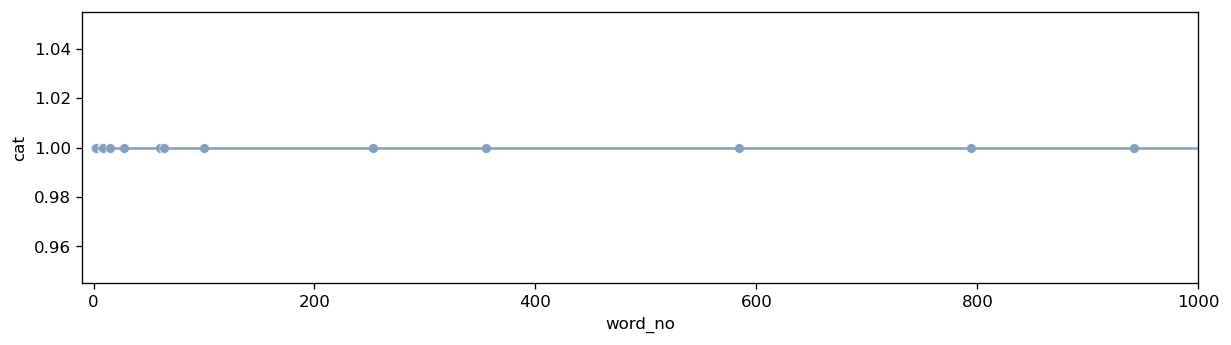

In [1010]:
plt.figure(figsize=(12, 3), dpi=120)
ax = plt.gca()
sns.scatterplot(data = df_first_appearance, x = 'word_no', y = 'cat', color = '#82A0BC')
plt.hlines(1, 0, 1000,color = '#82A0BC')
#sns.scatterplot(data = df_first_appearance, x = 'word_no', y = 'cat', color = '#82A0BC')
plt.xlim([-10,1000])

In [1026]:
def plot_pos_type(pos_type, y_shift_text,y_shift):
    df_sub = df_first_appearance.loc[df_first_appearance['word type (pos)'] == pos_type,:]
    sns.scatterplot(data = df_sub, x = 'Leo_months', color = '#82A0BC', s = 100)
    plt.text(x = df_sub['Leo_months'].values[0]-0.5, y = df_sub['word_no'].values[0]+y_shift_text, s = df_sub['word type (pos)'].values[0], color = 'white')
    #print( df_sub['word type (pos)'].values[0])

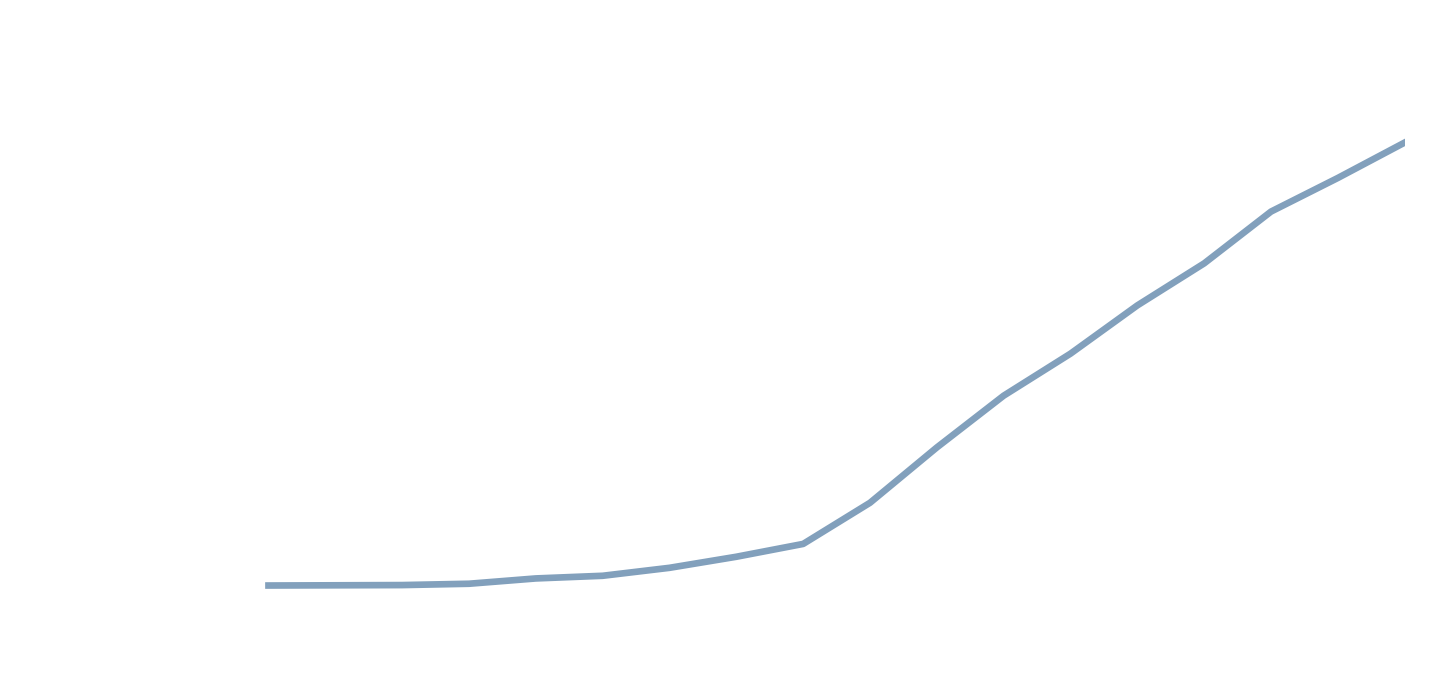

In [1028]:
plt.figure(figsize=(12, 6), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', linewidth = 4)
# plot_pos_type('PROPN', 40,0)
# plot_pos_type('NOUN', 40,0)
# plot_pos_type('ADJ/ADV', 40,0)
# plot_pos_type('INTJ', 80,0)
# plot_pos_type('DET', 120, 0) 
# plot_pos_type('VERBPART', 60, 10) 
plot_pos_type('PRON', 80, 40)
# plot_pos_type('NUM', 120, 40)
# plot_pos_type('ADP', 80, 40)
# plot_pos_type('AUX', 80, 40)
# plot_pos_type('PART', 80,40)
# plot_pos_type('CCONJ', 80,40)
# plot_pos_type('SCONJ', 80,40)

#sns.scatterplot(data = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN',:], x = 'Leo_months', y = 'word_no', color = '#82A0BC', s = 100)
#plt.text(x = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','Leo_months'], y = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word_no']+3, s = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word type (pos)'])
ax.set_title(r"First appearance of new types of words", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.ylabel('# of words',rotation=0, size = 18)
plt.xlabel(r"Kid's months", size = 18)
plt.xlim([8,26])
ax.yaxis.set_label_coords(-0.09,1.02)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
#plt.fill_between(df.Date.values, df.Data.values)
sns.despine()
plt.tight_layout()
plt.savefig('words_for_types.png', transparent=True)

"el que puedas hacer nebensatz termina la primera del Spracherwerb"

In [81]:
df.loc[df['word type (pos)'] == "DET"]

word language    month  Leo_months  word_no word type (pos)
14     este   german  2020-12          13       15             DET
47     otro  spanish  2021-02          16       50             DET
371   einer   german  2021-07          20      360             DET
372   einer   german  2021-07          20      360             DET
453  meiner   german  2021-07          21      444             DET
766   keine  spanish  2021-10          24      763             DET
767   keine  spanish  2021-10          24      763             DET
857  dieses   german  2021-11          25      855             DET
896     der   german  2021-12          25      898             DET
897    die    german  2021-12          25      899             DET
898     los   german  2021-12          25      900             DET
899      la   german  2021-12          25      901             DET

In [730]:
df.loc[df['word type (pos)'] == "VERBPART"]

word language    month  Leo_months  word_no word type (pos)
date                                                                   
2021-01-25    zu   german  2021-01          15       27        VERBPART
2021-05-07   auf   german  2021-05          18      143        VERBPART
2021-05-08    an   german  2021-05          18      146        VERBPART
2021-06-09  hoch   german  2021-06          19      250        VERBPART
2021-06-10   aus   german  2021-06          19      251        VERBPART

In [731]:
df.loc[df['word type (pos)'] == "VERB"].head(50)

word language    month  Leo_months  word_no  \
date                                                              
2021-04-21         essen   german  2021-04          18       99   
2021-05-04          mira  spanish  2021-05          18      135   
2021-05-14         vamos  spanish  2021-05          18      170   
2021-05-14         malen   german  2021-05          18      171   
2021-05-16           ven  spanish  2021-05          18      174   
2021-06-04       escucha  spanish  2021-06          19      229   
2021-06-05      pinching  neutral  2021-06          19      235   
2021-06-12     despierta  spanish  2021-06          19      263   
2021-06-13          fang   german  2021-06          19      269   
2021-06-17       caminar  spanish  2021-06          19      284   
2021-06-17      kuscheln   german  2021-06          19      285   
2021-06-17       schauen   german  2021-06          19      288   
2021-06-18        werfen   german  2021-06          19      292   
2021-06-18      klettern   german  2021-06          19      293   
2021-06-19  hochklettern   german  2021-06          20      300   
2021-06-21        beißen   german  2021-06          20      308   
2021-06-25       waschen   german  2021-06          20      325   
2021-06-25       aspirar  spanish  2021-06          20      326   
2021-06-25        morder  spanish  2021-06          20      327   
2021-06-30    streicheln   german  2021-06          20      348   
2021-06-30   rausschauen   german  2021-06          20      350   
2021-07-01       córrele  spanish  2021-07          20      355   
2021-07-03          cayó  spanish  2021-07          20      360   
2021-07-03       kitzeln   german  2021-07          20      363   
2021-07-05        messen   german  2021-07          20      368   
2021-07-10        cereal  spanish  2021-07          20      379   
2021-07-11     mitkommen   german  2021-07          20      384   
2021-07-11     ausziehen   german  2021-07          20      386   
2021-07-11     schlucken   german  2021-07          20      387   
2021-07-15         tocar  spanish  2021-07          20      398   
2021-07-16         tocar  spanish  2021-07          20      403   
2021-07-21       schiess   german  2021-07          21      422   
2021-07-31           ven  spanish  2021-07          21      446   
2021-08-01        buscar  spanish  2021-08          21      450   
2021-08-03          toma  spanish  2021-08          21      456   
2021-08-05        tienes  spanish  2021-08          21      470   
2021-08-07          saco  spanish  2021-08          21      476   
2021-08-07        putzen   german  2021-08          21      480   
2021-08-07        tienes  spanish  2021-08          21      483   
2021-08-08      leuchten   german  2021-08          21      484   
2021-08-08        sentar  spanish  2021-08          21      488   
2021-08-13      ausmalen   german  2021-08          21      500   
2021-08-13     durmiendo  spanish  2021-08          21      501   
2021-08-23     schneiden   german  2021-08          22      534   
2021-08-25         lesen   german  2021-08          22      536   
2021-08-26      anziehen   german  2021-08          22      541   
2021-08-26         haben   german  2021-08          22      544   
2021-08-26        kommen   german  2021-08          22      545   
2021-08-26     ausziehen   german  2021-08          22      546   
2021-08-27       abholen   german  2021-08          22      547   

           word type (pos)  
date                        
2021-04-21            VERB  
2021-05-04            VERB  
2021-05-14            VERB  
2021-05-14            VERB  
2021-05-16            VERB  
2021-06-04            VERB  
2021-06-05            VERB  
2021-06-12            VERB  
2021-06-13            VERB  
2021-06-17            VERB  
2021-06-17            VERB  
2021-06-17            VERB  
2021-06-18            VERB  
2021-06-18            VERB  
2021-06-19            VERB  
2021-06-21            VERB  
2021-06-25   

In [625]:
df.loc[df['word type (pos)'] == "PRON"]

word language    month  Leo_months  word_no word type (pos)
date                                                                      
2021-03-14       te  spanish  2021-03          16       59            PRON
2021-05-20    todos  spanish  2021-05          19      186            PRON
2021-05-23      mio  spanish  2021-05          19      193            PRON
2021-05-24      ich   german  2021-05          19      195            PRON
2021-05-29       yo  spanish  2021-05          19      208            PRON
2021-06-12      uno  spanish  2021-06          19      262            PRON
2021-06-13     nada  spanish  2021-06          19      270            PRON
2021-06-21    todos  spanish  2021-06          20      310            PRON
2021-08-28     alle   german  2021-08          22      550            PRON
2021-09-04  quienes  spanish  2021-09          22      574            PRON
2021-10-14     algo  spanish  2021-10          23      704            PRON
2021-10-18       es   german  2021-10          23      719            PRON
2021-11-07      was   german  2021-11          24      801            PRON
2021-11-28    genug   german  2021-11          25      868            PRON
2021-12-23       me  spanish  2021-12          26      930            PRON
2021-12-25   jemand   german  2021-12          26      937            PRON

In [624]:
df.loc[df['word type (pos)'] == "DET"]

word language    month  Leo_months  word_no word type (pos)
date                                                                     
2020-12-15    este  spanish  2020-12          13       15             DET
2021-02-23    otro  spanish  2021-02          16       48             DET
2021-07-02   einer   german  2021-07          20      359             DET
2021-07-30  meiner   german  2021-07          21      443             DET
2021-07-30   einer   german  2021-07          21      444             DET
2021-10-29   keine   german  2021-10          24      761             DET
2021-11-25  dieses   german  2021-11          25      855             DET
2021-12-06   keine   german  2021-12          25      889             DET
2021-12-07    die    german  2021-12          25      896             DET
2021-12-07     der   german  2021-12          25      897             DET
2021-12-08      la  spanish  2021-12          25      903             DET
2021-12-08     los  spanish  2021-12          25      904             DET

In [663]:
df.loc[df['word type (pos)'] == "PART"]

word language    month  Leo_months  word_no word type (pos)
date                                                                    
2021-09-07   doch   german  2021-09          22      585            PART
2021-11-07  nicht   german  2021-11          24      790            PART

<Figure size 720x432 with 0 Axes>

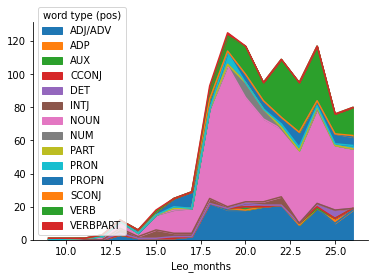

In [817]:
plt.figure(figsize = (10,6))
df.groupby(['Leo_months', 'word type (pos)'])['word_no'].count().unstack().plot.area()
sns.despine()

In [ ]:
df.reindex(reorderlist)

In [1048]:
pos_by_month = df.groupby(['Leo_months', 'word type (pos)'])['word_no'].count().unstack().T.reindex(list(df.groupby('word type (pos)')['word'].count().sort_values(ascending = False).to_frame().index))

In [ ]:
plt.figure(figsize=(12, 6), dpi=120)
ax = plt.gca()


#sns.scatterplot(data = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN',:], x = 'Leo_months', y = 'word_no', color = '#82A0BC', s = 100)
#plt.text(x = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','Leo_months'], y = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word_no']+3, s = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word type (pos)'])
ax.set_title(r"First appearance of new types of words", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.ylabel('# of words',rotation=0, size = 18)
plt.xlabel(r"Kid's months", size = 18)
plt.xlim([8,26])
ax.yaxis.set_label_coords(-0.09,1.02)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
#plt.fill_between(df.Date.values, df.Data.values)
sns.despine()
plt.tight_layout()
plt.savefig('words_for_types.png', transparent=True)

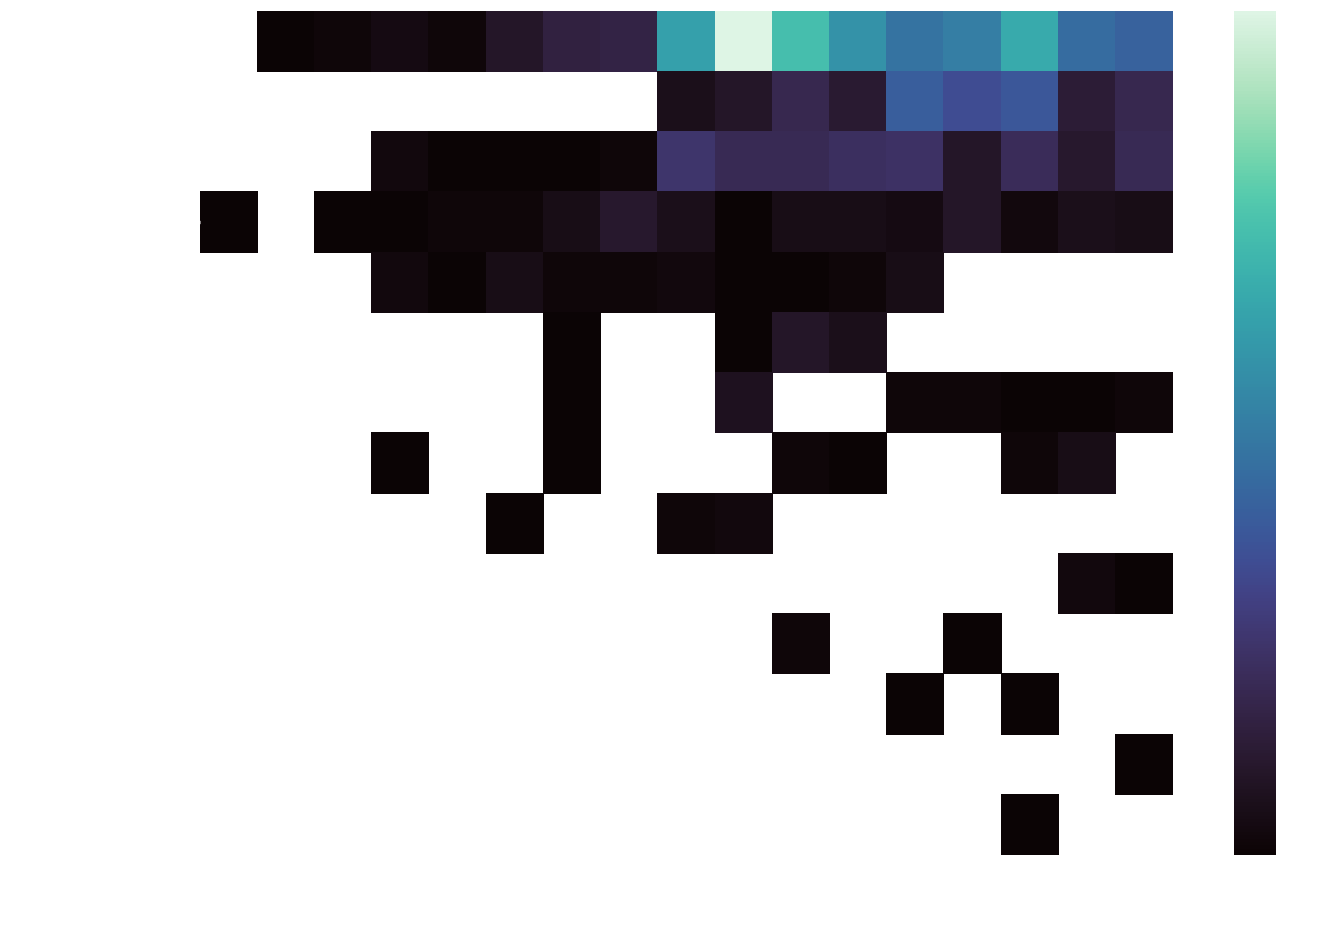

In [1049]:
plt.figure(figsize=(12, 8), dpi=120)
ax = plt.gca()
sns.heatmap(pos_by_month , cmap = 'mako')
#ax.set_title(r"New words by type", size = 28, color = 'white', loc = 'left', y= 2, pad=-14)
plt.ylabel(' ')
plt.xlabel(r"Kid's months", size = 20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=18, color = 'white', labelcolor = 'white')
#cbar.ax.yaxis.label.set_color('white')
plt.tight_layout()
plt.savefig('new_words_type.png', transparent=True)

In [1046]:
df[['word', 'word type (pos)']].to_csv('words_clean_pos.csv')

#### Manual cleaning wrong pos assignment

In [627]:
df.tail(50)

word language    month  Leo_months  word_no  \
date                                                                  
2022-01-03              Yoga   german  2022-01          26      954   
2022-01-03          hierlang   german  2022-01          26      955   
2022-01-04          Klavier    german  2022-01          26      956   
2022-01-04              Ruhe   german  2022-01          26      957   
2022-01-04      compartimos   spanish  2022-01          26      958   
2022-01-06        divertido   spanish  2022-01          26      959   
2022-01-06       schwiendlig   german  2022-01          26      960   
2022-01-06            limpio  spanish  2022-01          26      961   
2022-01-07           Ärztin    german  2022-01          26      962   
2022-01-07          Adrienne  neutral  2022-01          26      963   
2022-01-08        Würstchen    german  2022-01          26      964   
2022-01-08           traurig   german  2022-01          26      965   
2022-01-09           español  spanish  2022-01          26      966   
2022-01-09              etwa   german  2022-01          26      967   
2022-01-09      french-toast  neutral  2022-01          26      968   
2022-01-09           ziehen    german  2022-01          26      969   
2022-01-13              Elch   german  2022-01          26      970   
2022-01-13             paseo  spanish  2022-01          26      971   
2022-01-13        Massagebar   german  2022-01          26      972   
2022-01-13       Dibbelabbes   german  2022-01          26      973   
2022-01-13             Pause   german  2022-01          26      974   
2022-01-14           ándale   spanish  2022-01          26      975   
2022-01-14        erfrieren    german  2022-01          26      976   
2022-01-15            Stress   german  2022-01          26      977   
2022-01-15             Fisch   german  2022-01          26      978   
2022-01-16           Winter    german  2022-01          26      979   
2022-01-16            Schule   german  2022-01          26      980   
2022-01-16              weit   german  2022-01          26      981   
2022-01-16              Welt   german  2022-01          26      982   
2022-01-16           Narwal    german  2022-01          26      983   
2022-01-16           Walross   german  2022-01          26      984   
2022-01-16  Pip- Langstrumpf  neutral  2022-01          26      985   
2022-01-16          playlist   german  2022-01          26      986   
2022-01-16         Menschen    german  2022-01          26      987   
2022-01-16             paja   spanish  2022-01          26      988   
2022-01-17        Werkstatt    german  2022-01          26      989   
2022-01-17             Seite   german  2022-01          26      990   
2022-01-17        compartir   spanish  2022-01          26      991   
2022-01-17         Fahrtende   german  2022-01          26      992   
2022-01-17         schimpfen   german  2022-01          26      993   
2022-01-17         Schnupfen   german  2022-01          26      994   
2022-01-17              bote  spanish  2022-01          26      995   
2022-01-17         accidente  spanish  2022-01          26      996   
2022-01-17           Ruhrei    german  2022-01          26      997   
2022-01-18           morning  neutral  2022-01          27      998   
2022-01-18            Nektar   german  2022-01          27      999   
2022-01-19        festhalten   german  2022-01          27     1000   
2022-01-19           Kompost   german  2022-01          27     1001   
2022-01-19         Cold-Brew   german  2022-01          27     1002   
2022-01-24         Geschenk    german  2022-01          27     1003   

           word type (pos)  
date                        
2022-01-03            NOUN  
2022-01-03             ADV  
2022-01-04           PROPN  
2022-01-04            NOUN  
2022-01-04            VERB  
2022-01-06             ADJ  
2022-01-06             ADV  
2022-01-06             ADJ  
2022-01-07            NOUN  
2022-01-07  

In [736]:
df.loc[df['word type (pos)'] == "VERB"]

word language    month  Leo_months  word_no word type (pos)
date                                                                         
2021-04-21       essen   german  2021-04          18       99            VERB
2021-05-04        mira  spanish  2021-05          18      135            VERB
2021-05-14       vamos  spanish  2021-05          18      170            VERB
2021-05-14       malen   german  2021-05          18      171            VERB
2021-05-16         ven  spanish  2021-05          18      174            VERB
...                ...      ...      ...         ...      ...             ...
2022-01-14  erfrieren    german  2022-01          26      976            VERB
2022-01-16       paja   spanish  2022-01          26      988            VERB
2022-01-17  compartir   spanish  2022-01          26      991            VERB
2022-01-17   schimpfen   german  2022-01          26      993            VERB
2022-01-19  festhalten   german  2022-01          27     1000            VERB

[170 rows x 6 columns]

In [729]:
df.loc[df['word'] == 'hoch', 'word type (pos)'] = "VERBPART"

In [1045]:
df.loc[df['word'] == 'mit', 'word type (pos)'] = "VERBPART"

In [685]:
df.loc[df['word'] == 'de nada', 'word type (pos)'] = "INTJ"

In [582]:
df.loc[df['word'] == 'Abuela', 'word'] = 'Abu'

In [735]:
df.loc[df['word'] == 'paja', 'word type (pos)'] = "NOUN"

In [640]:
df.loc[df['word'] == 'nein', 'word type (pos)'] = "PART"

In [538]:
df.loc[df['word'] == 'keine', 'word type (pos)'] = 'DET'

In [523]:
df.loc[df['word'] == 'Kiki', 'word type (pos)'] = 'PROPN'

In [722]:
df.loc[df['word'] == 'cereal', 'word type (pos)'] = 'VERB'

In [718]:
df.loc[df['word'] == 'fuera', 'word type (pos)'] = 'ADJ'

In [596]:
df.loc[df['word'] == 'keine', 'language'] = 'german'

In [428]:
df.loc[df['word'] == 'Wohnung', 'language'] = 'german'

In [597]:
df.drop('language)', axis = 1, inplace= True)

In [573]:
df.tail()

word language    month  Leo_months  word_no word type (pos)
date                                                                         
2022-01-18      Nektar   german  2022-01          27      999            NOUN
2022-01-19  festhalten   german  2022-01          27     1000            VERB
2022-01-19     Kompost   german  2022-01          27     1001            NOUN
2022-01-19   Cold-Brew   german  2022-01          27     1002            NOUN
2022-01-24   Geschenk    german  2022-01          27     1003            NOUN

#### Ups, lots of word duplicates. To do for after the talk

In [563]:
df.drop_duplicates(subset = ['word'])

word language    month  Leo_months  word_no word type (pos)  \
date                                                                            
2020-08-07        Mama  neutral  2020-08           9        1            NOUN   
2020-09-24        agua  spanish  2020-09          11        2            NOUN   
2020-10-07      Abuela  spanish  2020-10          11        3           PROPN   
2020-10-31        luna  spanish  2020-10          12        4            NOUN   
2020-11-05      Banane   german  2020-11          12        5            NOUN   
...                ...      ...      ...         ...      ...             ...   
2022-01-18      Nektar   german  2022-01          27      999            NOUN   
2022-01-19  festhalten   german  2022-01          27     1000            VERB   
2022-01-19     Kompost   german  2022-01          27     1001            NOUN   
2022-01-19   Cold-Brew   german  2022-01          27     1002            NOUN   
2022-01-24   Geschenk    german  2022-01          27     1003            NOUN   

           language)  
date                  
2020-08-07       NaN  
2020-09-24       NaN  
2020-10-07       NaN  
2020-10-31       NaN  
2020-11-05       NaN  
...              ...  
2022-01-18       NaN  
2022-01-19       NaN  
2022-01-19       NaN  
2022-01-19       NaN  
2022-01-24       NaN  

[942 rows x 7 columns]

In [43]:
df.drop_duplicates(subset = ['word']).drop('word_no', axis = 1).to_csv('words_languages.csv')

### Show Words? 
maybe better plotly

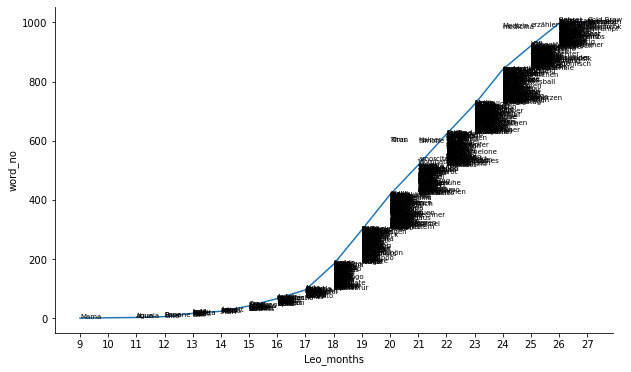

In [189]:
plt.figure(figsize = (10,6))
sns.lineplot(data = words_month, x = 'Leo_months', y = 'word_no')
sns.despine()
plt.xticks(ticks = np.arange(start = words_month['Leo_months'].min(), stop = words_month['Leo_months'].max()+1))
for i,word in words.iterrows():
    plt.text(x = word.Leo_months, y = word.word_no, s = word.word, size = 7)